# ECs vs Thesis Grade Analysis

### Importing libraries/loading data/custom functions

In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import copy

In [19]:
# Reading in the data

os.chdir('C:\\Users\\yeachan153\\Desktop\\Methodology-Consulting\\Project')
data = pd.read_csv('Master Dataframe.csv')
print(list(data)[0:12]) # Columns

['StudentID', 'Programme code', 'Study plan', 'Description', 'EC taken', 'Start Date', 'Graduation date', 'MSc duration', 'Specialisation', 'thesis_grades', 'Code ondersch.', 'Formele omschr.']


In [20]:
# Running custom functions

def rand_jitter(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

### Seperating MSc/RMes Data, and filtering datapoints with insufficient ECs 

In [21]:
# 1) Seperate into RMes and MSc, check for missing values

MSc = data[data['Description']=='M Psychologie']
RMes = data[data['Description']=='M Psychology (res)']

set(RMes['EC taken'].isnull())
set(RMes['thesis_grades'].isnull())
set(MSc['EC taken'].isnull())
set(MSc['thesis_grades'].isnull())

{False}

In [22]:
# 2) Remove MSc and RMes students with <60ECs & <120ECs

print(str(MSc.shape[0] - MSc[MSc['EC taken'] >= 60].shape[0]) + ' MSc students removed with <60ECs')
MSc_filtered = MSc[MSc['EC taken'] >= 60]

print(str(RMes.shape[0] - RMes[RMes['EC taken'] >= 120].shape[0]) + ' RMes students removed with <120ECs')
RMes_filtered = RMes[RMes['EC taken'] >= 120]

121 MSc students removed with <60ECs
81 RMes students removed with <120ECs


### Assessing the correlation between Research Master (RMes) student thesis grades and ECs taken

In [23]:
# 3a) Check normality of ECs and thesis_grades
# 3b) Running spearmans + graph

print(stats.kstest(RMes_filtered['thesis_grades'],'norm'))
print(stats.kstest(RMes_filtered['EC taken'],'norm'))

stats.spearmanr(RMes_filtered['thesis_grades'], RMes_filtered['EC taken']) # rs = 0.0572, p = 0.520

KstestResult(statistic=0.99999999995984, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


SpearmanrResult(correlation=0.05723857469072223, pvalue=0.5193769967320174)

We can see it is appropriate to run a Spearman's test as most likely we don't have bivariate normality. There doesn't seem to be a correlation between ECs and thesis grades for RMes students

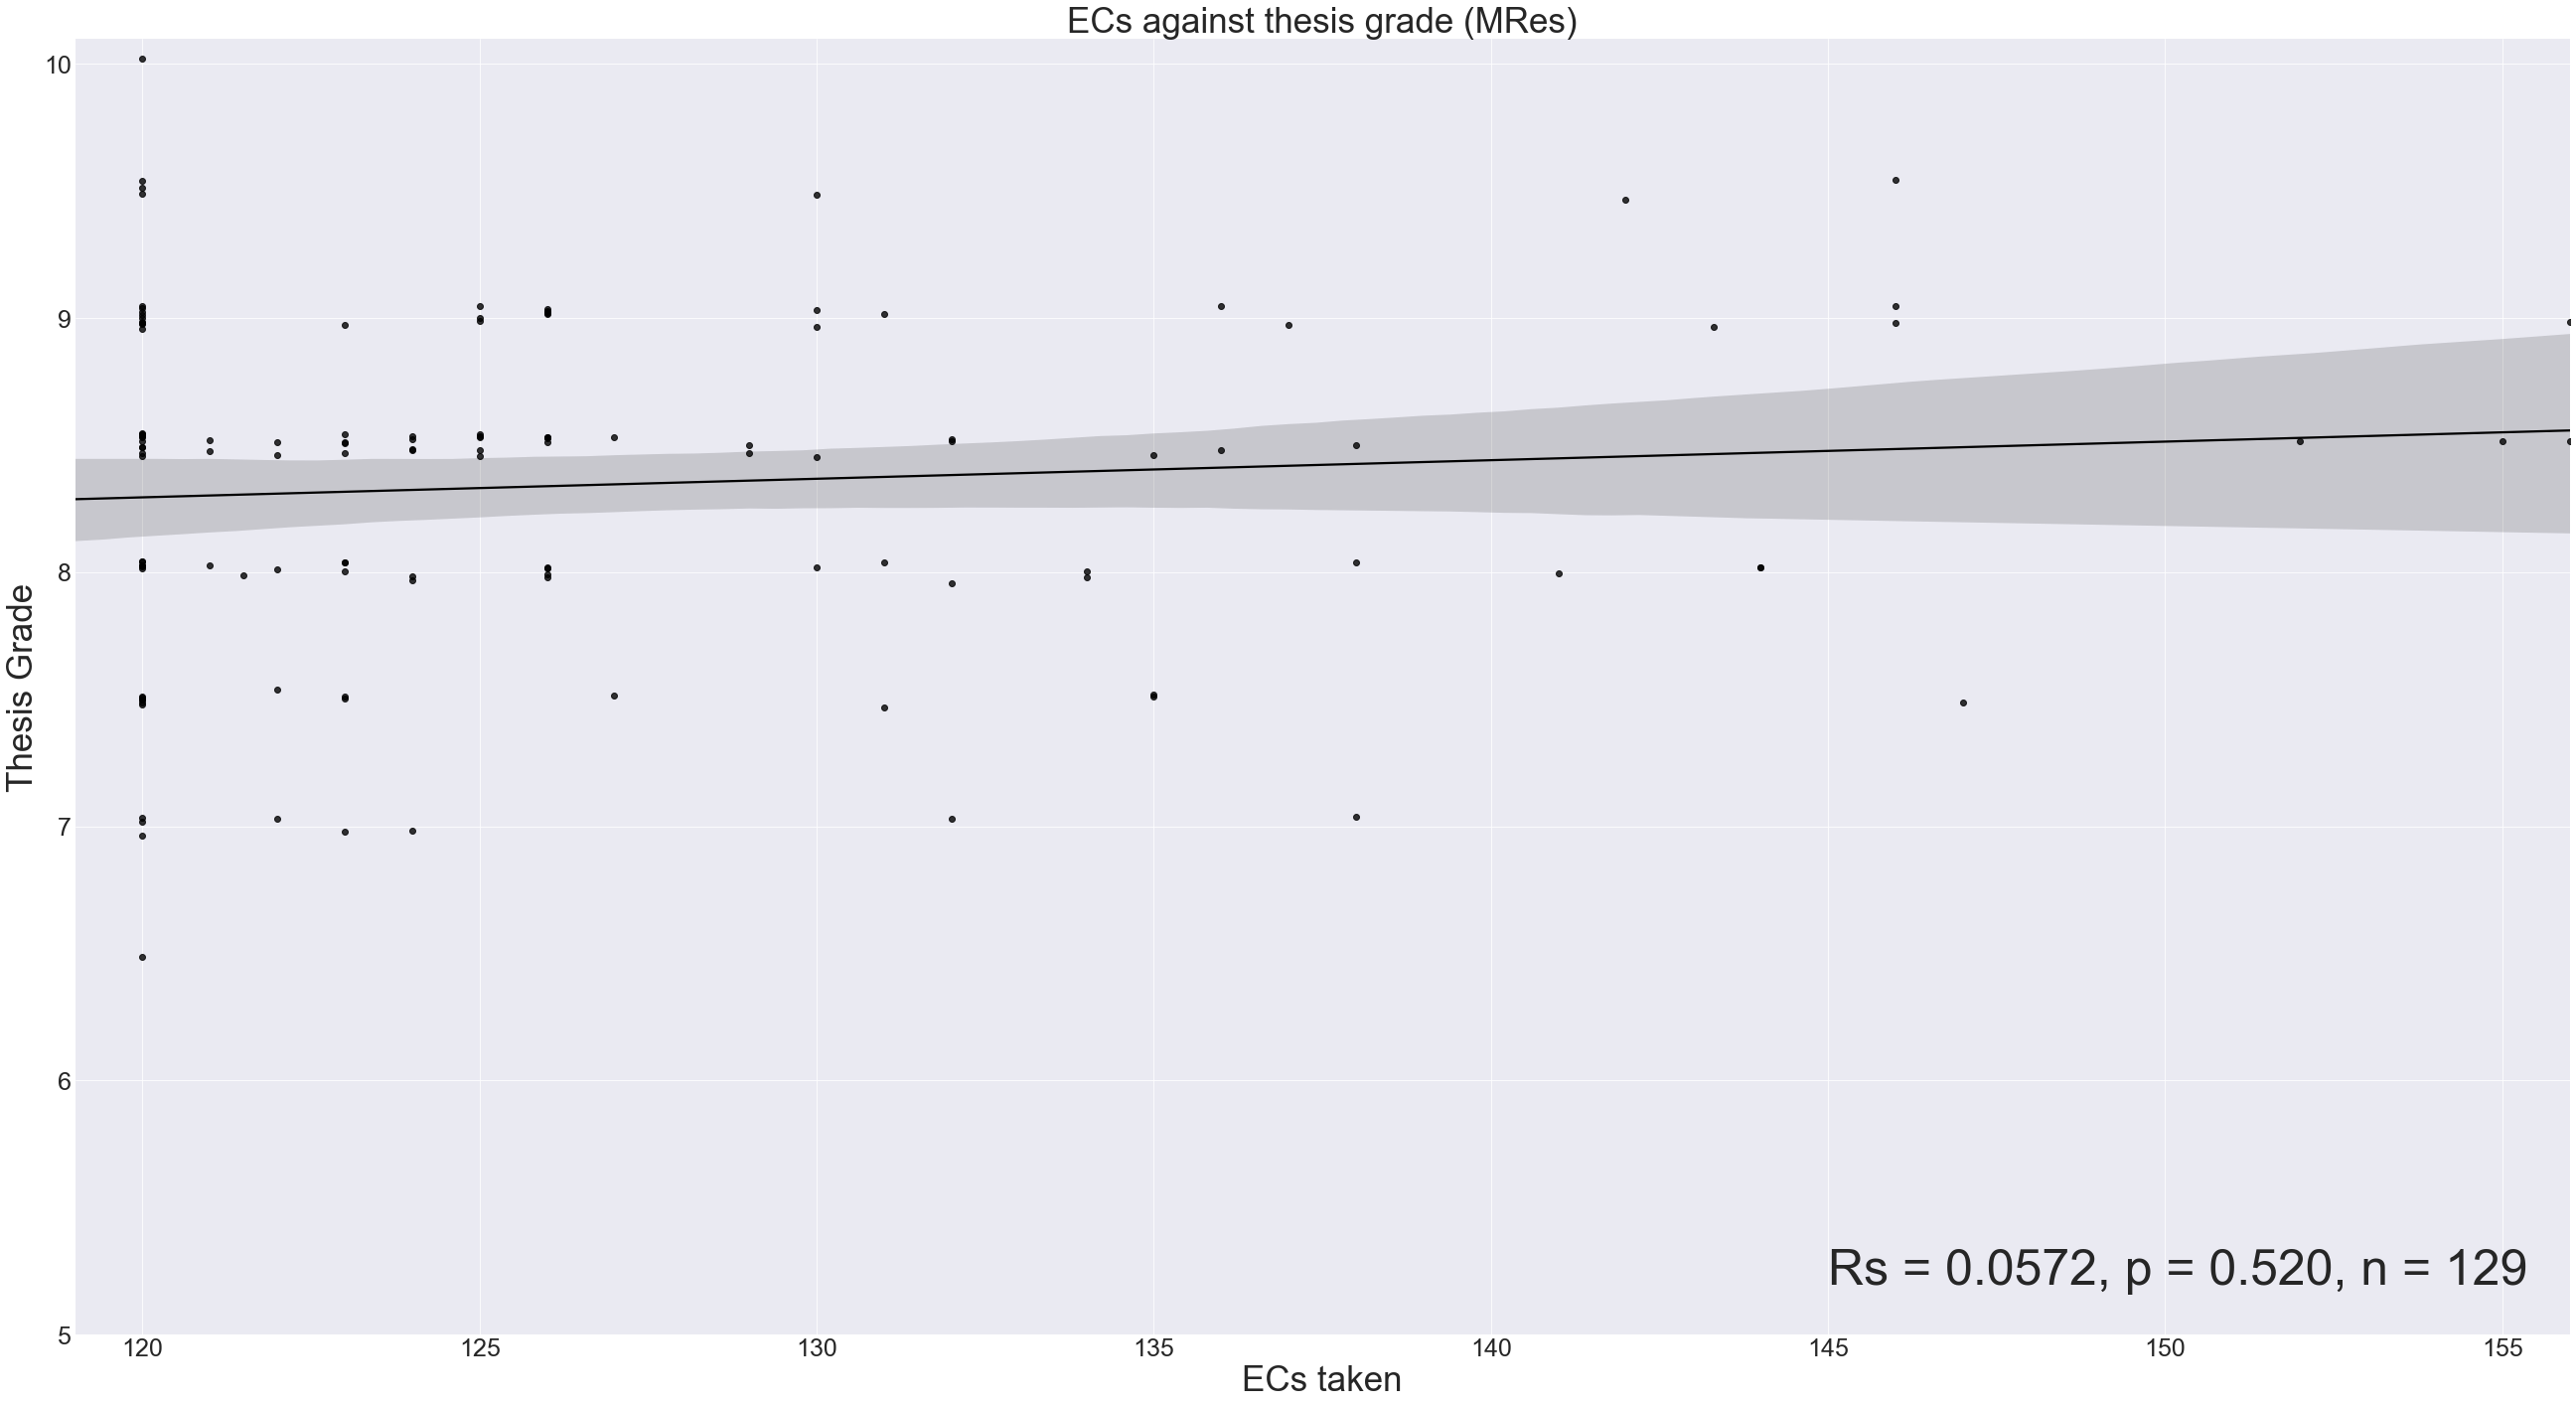

In [24]:
# 3c) Creating a scatterplot in seaborn

fig, ax = plt.subplots(figsize = (45,24))
sns.regplot(RMes_filtered['EC taken'], RMes_filtered['thesis_grades'], color = 'black', y_jitter = 0.05)
plt.xlabel('ECs taken', fontsize = 35)
plt.ylabel('Thesis Grade', fontsize = 35)
plt.title('ECs against thesis grade (MRes)', fontsize = 35)
sns.set_style('darkgrid')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
ax.set_ylim(5,10.1)
ax.set_xlim(119, 156)
ax.text(145, 5.2, 'Rs = 0.0572, p = 0.520, n = 129', fontsize = 50)
plt.show()

### Assessing the correlation between 1 Year Master (MSc) student thesis grades and ECs taken

In [8]:
print(stats.kstest(MSc_filtered['thesis_grades'],'norm'))
print(stats.kstest(MSc_filtered['EC taken'],'norm'))

stats.spearmanr(MSc_filtered['thesis_grades'], MSc_filtered['EC taken']) # rs = 0.102, p = 0.0046

KstestResult(statistic=0.9999999239503948, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


SpearmanrResult(correlation=0.1019719650145763, pvalue=0.004620051848150807)

We see a small positive correlation, i.e. we see a small increase in thesis grades as the number of ECs increase.

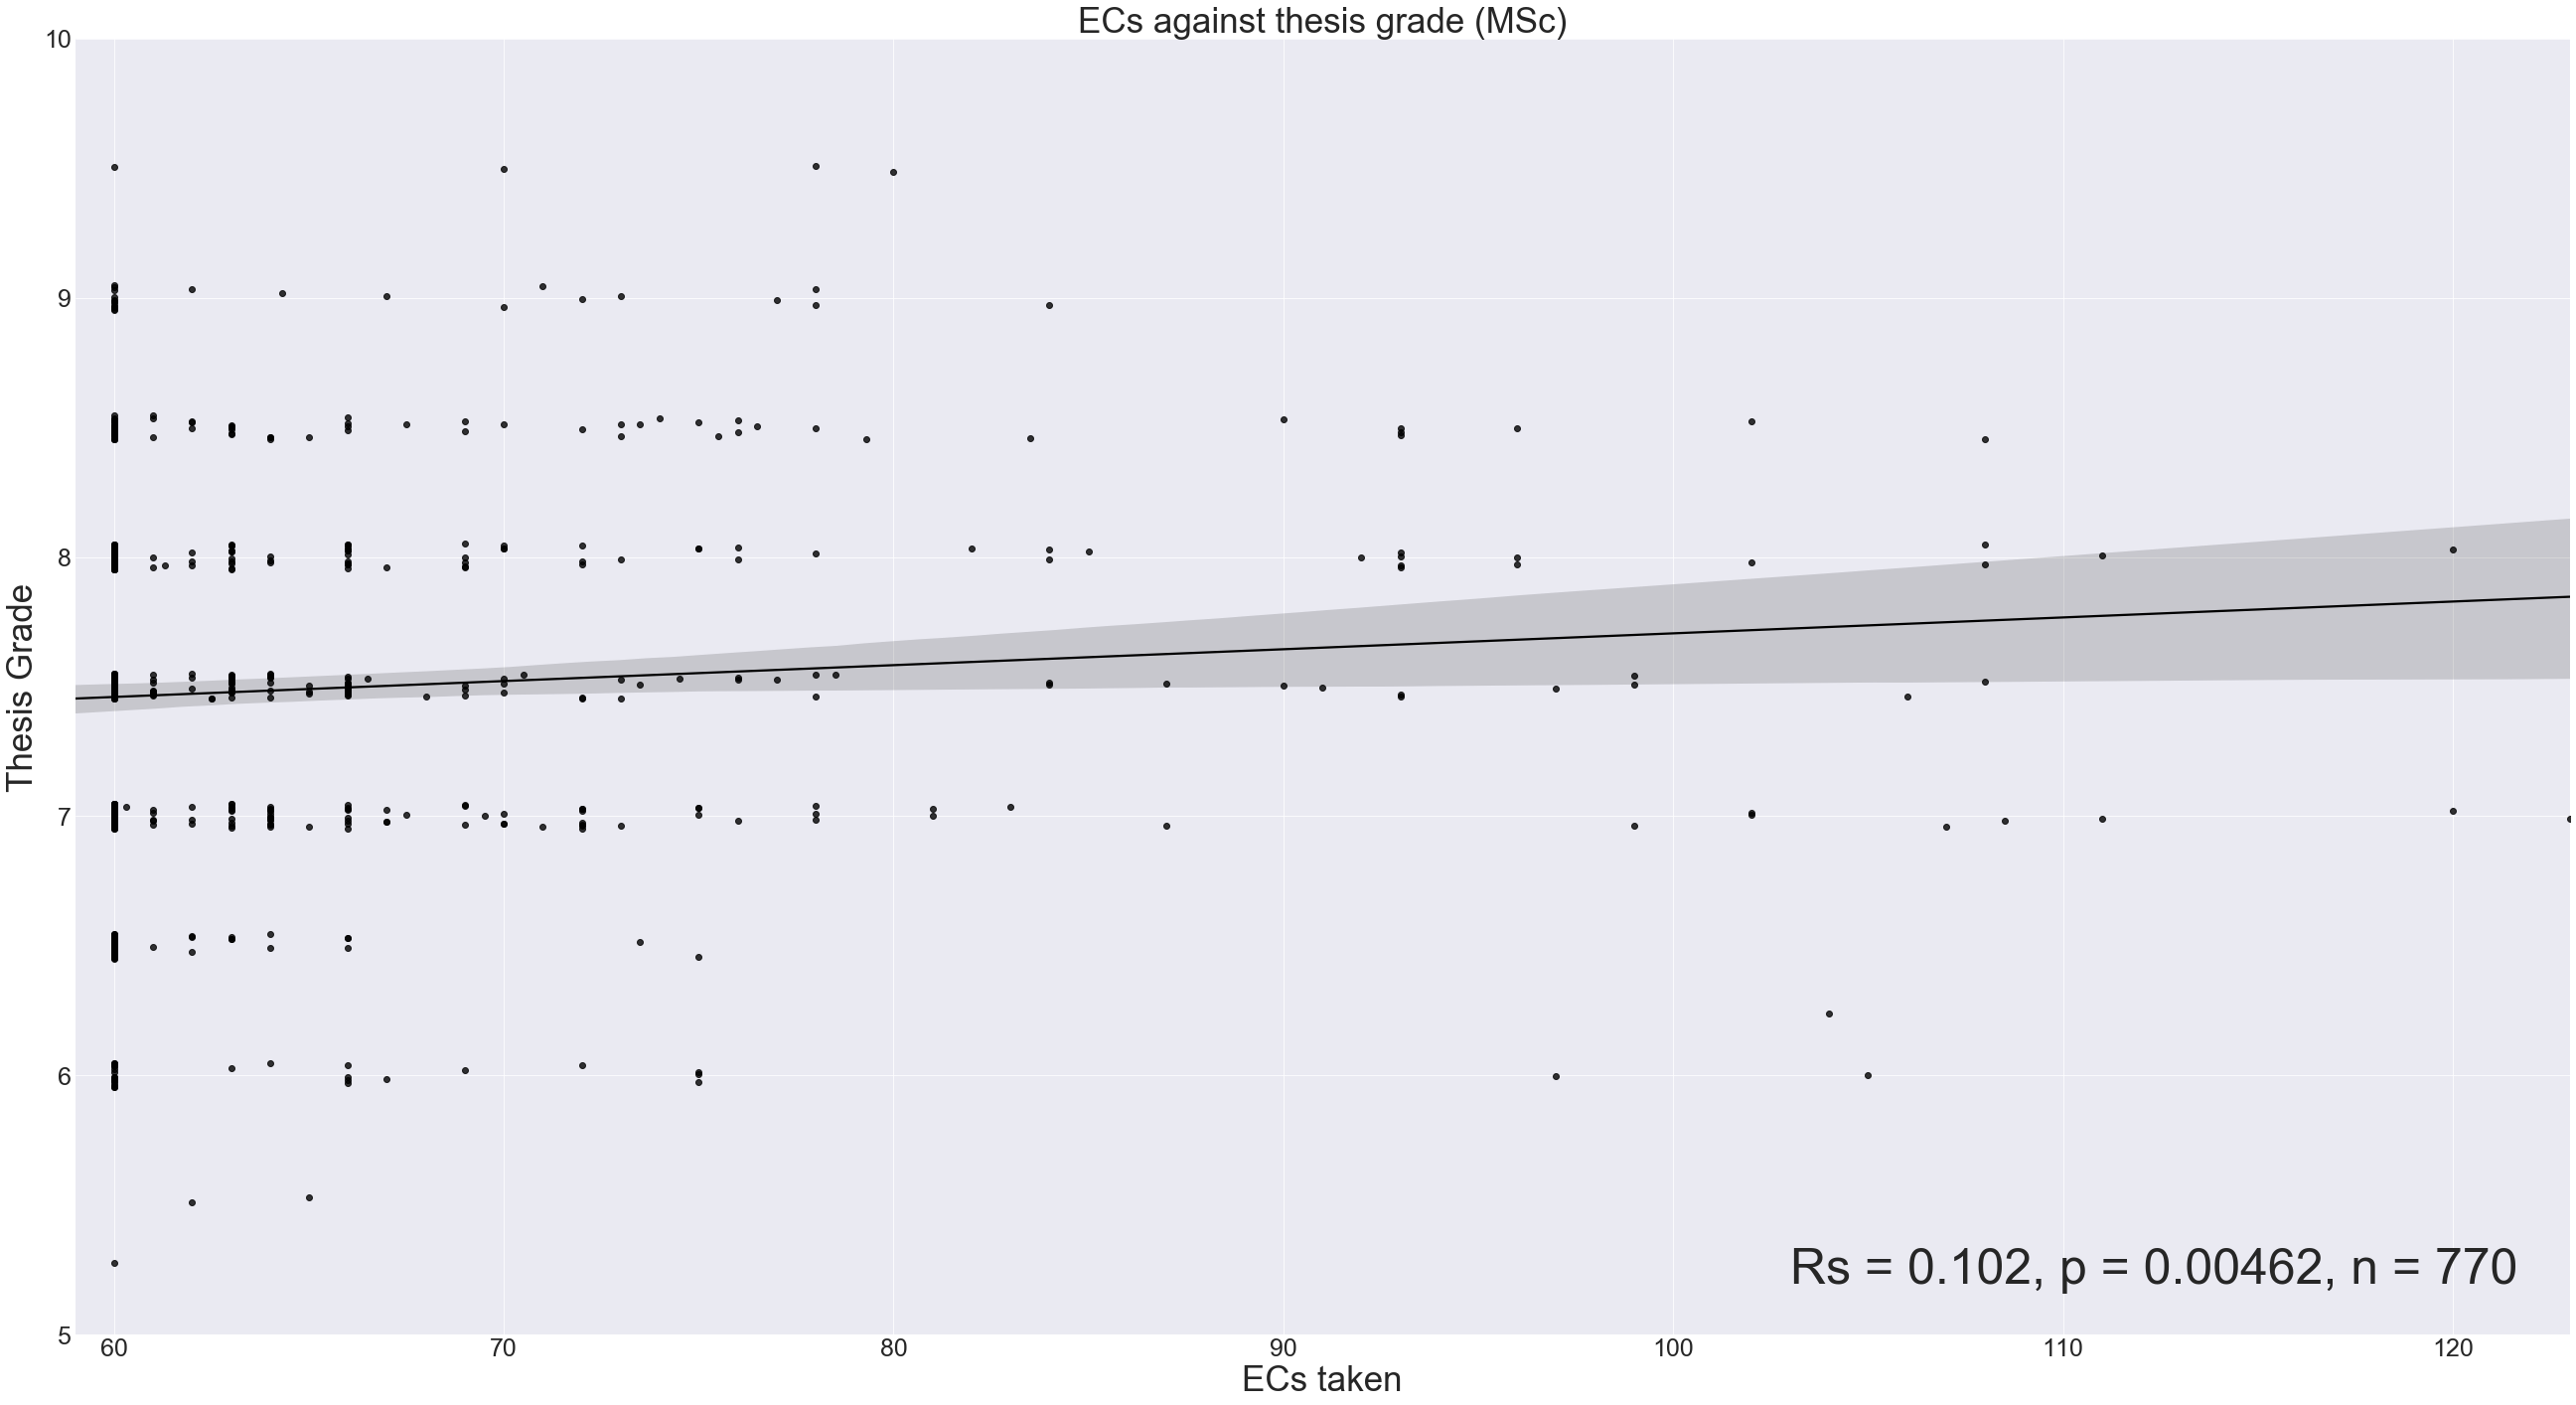

In [9]:
fig, ax = plt.subplots(figsize = (45,24))
sns.regplot(MSc_filtered['EC taken'], MSc_filtered['thesis_grades'], color = 'black', y_jitter = 0.05)
plt.xlabel('ECs taken', fontsize = 35)
plt.ylabel('Thesis Grade', fontsize = 35)
plt.title('ECs against thesis grade (MSc)', fontsize = 35)
sns.set_style('darkgrid')
plt.xticks(fontsize = 25)
ax.set_ylim(5,10)
ax.set_xlim(59,123)
plt.yticks(fontsize = 25)
ax.text(103, 5.2, 'Rs = 0.102, p = 0.00462, n = 770', fontsize = 50)
plt.show()

### Examining if correlations exist within specialisations for the 1 year Master programs

In [10]:
MSc_filtered['Specialisation'].value_counts().sort_values(ascending = False)

Spec Work & Organ. Psychology     192
Spec Social Psychology            186
Track Sport & Performance Psy      85
General Psychology                 67
Track Behaviour & Health           66
Track Training & Development       60
Spec Brain & Cognition             35
Track Clinical Forensic Psych      13
Spec Clinical Psychology           13
Spec Clinical Developmental Ps     11
Inactief T&D                        8
Spec Psychological Methods          8
Psycho. Gedragsbeïnvloeding         5
Spec Developmental Psychology       4
Spec Clinical Neuropsychology       3
Name: Specialisation, dtype: int64

In [11]:
print(str(MSc_filtered['Specialisation'].value_counts().sum()) + ' out of ' + str(len(MSc_filtered)) +
      ' students have specialisations') 

756 out of 770 students have specialisations


In [12]:
# Selecting specialisations with more than 30 people

MSc_filtercopy = copy.deepcopy(MSc_filtered)
groups = MSc_filtercopy.groupby('Specialisation')
MSc_filtercopy = groups.filter(lambda x: len(x) > 30) 

print('After selecting specialisations with more than 30 students, we are left with ' + str(len(MSc_filtercopy)) + ' students')
print('We will look at: ' + ", ".join(list(set(MSc_filtercopy['Specialisation']))))

spec_groups = MSc_filtercopy.groupby('Specialisation')
list_df = [spec_groups.get_group(x) for x in spec_groups.groups]

After selecting specialisations with more than 30 students, we are left with 691 students
We will look at: Spec Social Psychology, Spec Work & Organ. Psychology, Track Training & Development, Track Behaviour & Health, Track Sport & Performance Psy, General Psychology, Spec Brain & Cognition


#### Checking for normality between all 7 specialisations

In [13]:
norm_dict = {}

for i in range(len(list_df)):
    current_df = list_df[i]
    current_spec = "".join(list(set(current_df['Specialisation'])))
    norm_dict[current_spec] = [stats.kstest(current_df['thesis_grades'],'norm')]
    norm_dict[current_spec].append(stats.kstest(current_df['EC taken'],'norm'))

print(norm_dict)

{'General Psychology': [KstestResult(statistic=0.9999999810104375, pvalue=0.0), KstestResult(statistic=1.0, pvalue=0.0)], 'Spec Brain & Cognition': [KstestResult(statistic=0.9999999990134123, pvalue=0.0), KstestResult(statistic=1.0, pvalue=0.0)], 'Spec Social Psychology': [KstestResult(statistic=0.9999999239503948, pvalue=0.0), KstestResult(statistic=1.0, pvalue=0.0)], 'Spec Work & Organ. Psychology': [KstestResult(statistic=0.9999999810104375, pvalue=0.0), KstestResult(statistic=1.0, pvalue=0.0)], 'Track Behaviour & Health': [KstestResult(statistic=0.9999999990134123, pvalue=0.0), KstestResult(statistic=1.0, pvalue=0.0)], 'Track Sport & Performance Psy': [KstestResult(statistic=0.9999999990134123, pvalue=0.0), KstestResult(statistic=1.0, pvalue=0.0)], 'Track Training & Development': [KstestResult(statistic=0.9999999990134123, pvalue=0.0), KstestResult(statistic=1.0, pvalue=0.0)]}


We can see that in most likelihood, we fail the bivariate normality assumption to run a Pearson's correlation. Therefore we run a spearman's rank-order test.

#### Checking for significant correlations

In [14]:
cor_dict = {}

for i in range(len(list_df)):
    current_df = list_df[i]
    current_spec = "".join(list(set(current_df['Specialisation'])))
    cor_dict[current_spec] = stats.spearmanr(current_df['thesis_grades'], current_df['EC taken'])

cor_dict

{'General Psychology': SpearmanrResult(correlation=-0.06810538728221015, pvalue=0.5839582430411634),
 'Spec Brain & Cognition': SpearmanrResult(correlation=0.1661203634644005, pvalue=0.3402160988892703),
 'Spec Social Psychology': SpearmanrResult(correlation=0.052534048128736355, pvalue=0.47638371818149006),
 'Spec Work & Organ. Psychology': SpearmanrResult(correlation=0.09900099388439297, pvalue=0.17187656294943546),
 'Track Behaviour & Health': SpearmanrResult(correlation=-0.1664164271339939, pvalue=0.18172073606042322),
 'Track Sport & Performance Psy': SpearmanrResult(correlation=0.01673136714811609, pvalue=0.8792009493163291),
 'Track Training & Development': SpearmanrResult(correlation=0.29742948559961974, pvalue=0.0210039027078032)}

We only see a statistically significant correlation in 'Track Training & Development'

#### Plotting EC vs. thesis grade for 'Track Training & Development'

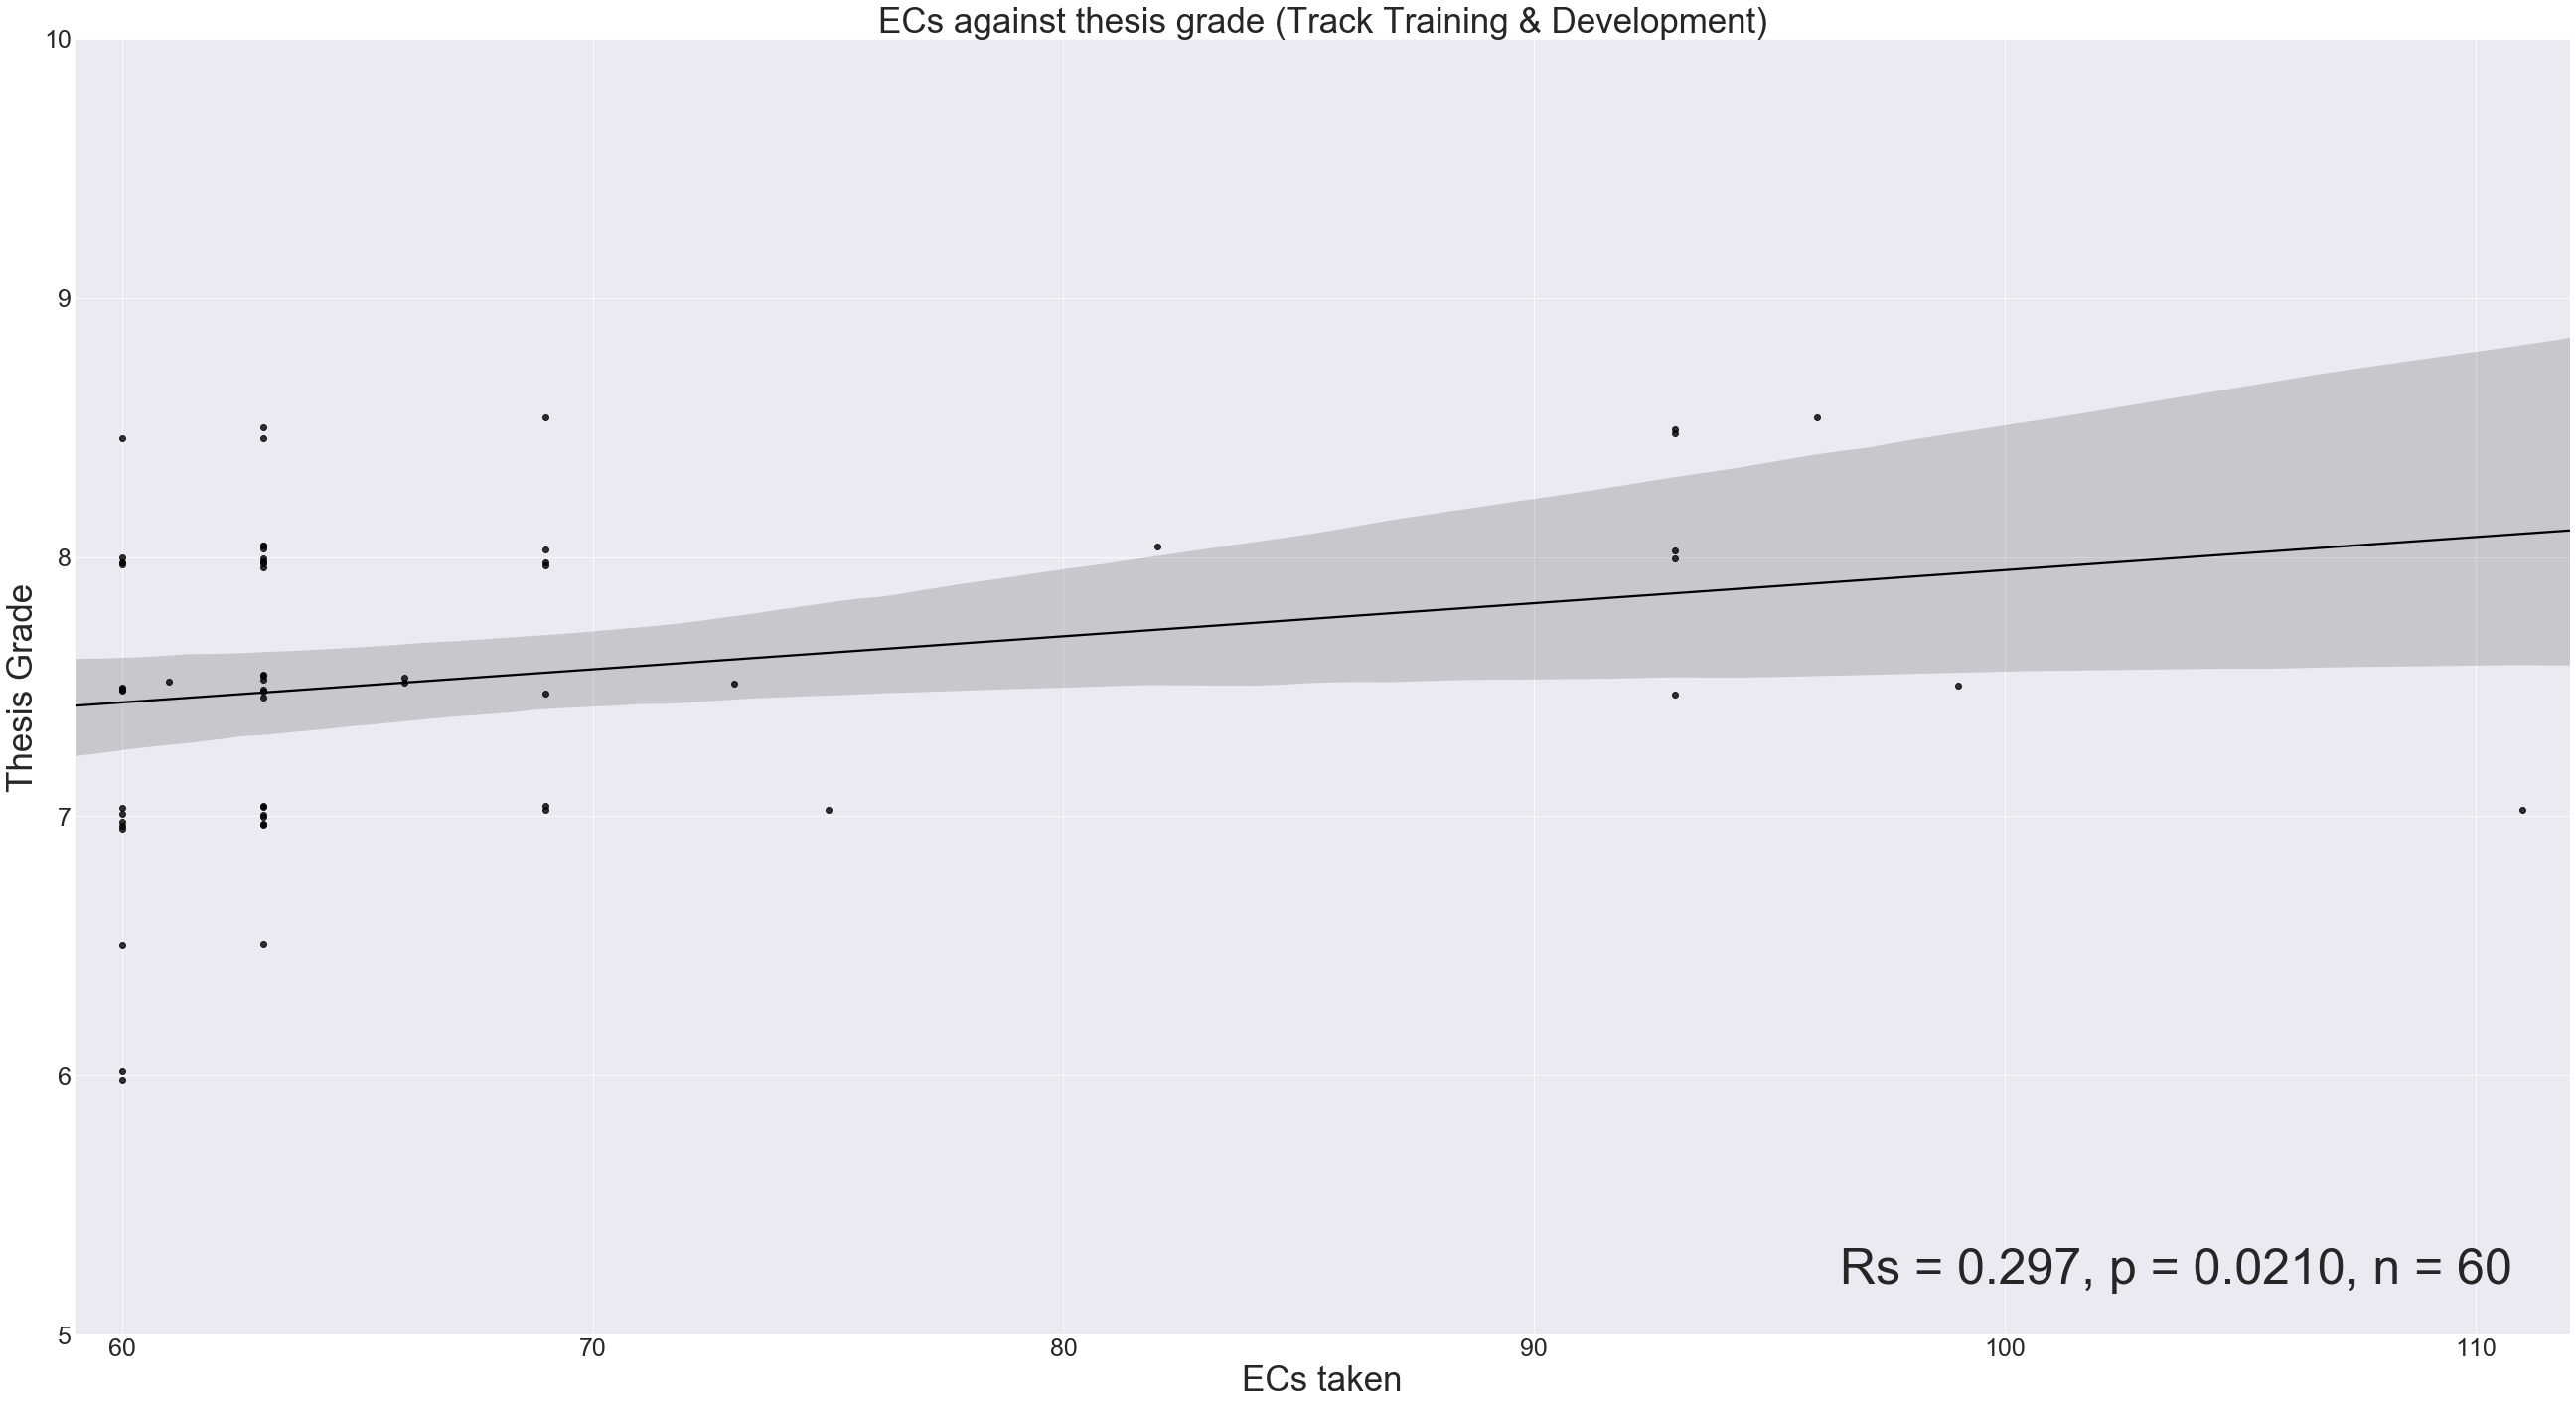

In [15]:
fig, ax = plt.subplots(figsize = (45,24))
sns.regplot(list_df[6]['EC taken'],list_df[6]['thesis_grades'], color = 'black', y_jitter = 0.05)
plt.xlabel('ECs taken', fontsize = 35)
plt.ylabel('Thesis Grade', fontsize = 35)
plt.title('ECs against thesis grade (Track Training & Development)', fontsize = 35)
sns.set_style('darkgrid')
plt.xticks(fontsize = 25)
ax.set_ylim(5,10)
ax.set_xlim(59,112)
plt.yticks(fontsize = 25)
ax.text(96.5, 5.2, 'Rs = 0.297, p = 0.0210, n = 60', fontsize = 50)
plt.show()

We do seem to see a weak correlation between increasing ECs and increasing thesis grades in 'Track Training & Development'.

###  Does the correlation for MSc students as a whole remain signficant after removing Training & Development? 

In [16]:
filtered = MSc_filtered[MSc_filtered['Specialisation'] != 'Track Training & Development']
stats.spearmanr(filtered['EC taken'], filtered['thesis_grades'])

SpearmanrResult(correlation=0.08408915902191341, pvalue=0.025048973521278172)